<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #2b6777; color:#ffffff;text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Airline passenger satisfaction (Part 2)</h1></div>

<center><a><img src="https://apartmentinteriors.ru/wp-content/uploads/samolot-charter-private-jet-charter-02.jpg" border="3" width=800 height=600 class="center"></a>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Introduction</h1></div>

<b>In the first part:</b>
<ul>
    <li>This dataset was described and analyzed in detail.</li>
    <li>Some data preprocessing was done.</li>
    <li>Several machine learning algorithms (kNN, SVC, Random Forest, Extremely Randomized Trees, AdaBoost and GBT) were launched.
    <li>The results of their work were presented.</li>
</ul>

<b>In this part:</b>
<ul>
    <li>The neural network will be trained.</li>
    <li>The hyperparameters will be selected in several ways.</li>
    <li>Conclusions based on the results of the work are given.</li>
</ul>

***
<b>If you haven't seen the first part, I recommend that you first read it.</b>

Link to the first part: [**Airline Passenger Satisfaction (Part 1)**](https://www.kaggle.com/code/frixinglife/airline-passenger-satisfaction-part-1)
***


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Task description</h1></div>

**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Reading data</h1></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

Table dimensions:

In [3]:
data.shape

(103904, 25)

Each row corresponds to one passenger, and each column to a specific feature.<br>
Let's look at the first row of the data set:

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Let's take a closer look at the dataset data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

You may notice the following:
<ol>
     <li><b>The column</b> corresponding to the <b>Arrival Delay in Minutes feature has 310 missing values</b>.</li>
     <li><b>The first two features are useless and will not affect the classification</b>, so you should get rid of them.</li>
     <li><b>Many columns contain categorical values</b> but are of type 'object' or 'int64'. Let's replace this type with a special one designed for storing categorical values.</li>
</ol>

In [6]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [7]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

Now the dataset information looks like this:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

The first 22 features have been detailed above. The <b>satisfaction</b> feature is the target.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Filling in missing values</h1></div>

Let's see how many missing values are in each column of the table:

In [9]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Fill in the missing values with <b>medians</b> in the columns corresponding to quantitative features:

In [10]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [11]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


This table shows that there are no more missing values.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Handling categorical features</h1></div>

We divide the signs into quantitative and categorical:

In [13]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

We divide categorical features into binary and non-binary:

In [14]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


Let's look at the unique values for each binary feature:

In [15]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


Let's do the binarization:

In [16]:
for col in binary_columns:
    data[col] = data[col].astype('object')
    k = 0
    for uniq in data[col].unique():
        data.at[data[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(data[col].describe(), end = '\n\n')

count     103904
unique         2
top            1
freq       52727
Name: Gender, dtype: int64

count     103904
unique         2
top            0
freq       84923
Name: Customer Type, dtype: int64

count     103904
unique         2
top            1
freq       71655
Name: Type of Travel, dtype: int64



Now let's look at non-binary categorical features:

In [17]:
data[nonbinary_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


The following vectorization method is applicable to non-binary features:

The feature j, which takes s values, will be replaced by s features, which take the values 0 or 1, depending on what the value of the original feature j is.

This vectorization is carried out by the get_dummies method:

In [18]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [19]:
len(data_nonbinary.columns)

86

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Normalization of quantitative features</h1></div>

We have the following quantitative characteristics:

In [20]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Let's perform a <b>standardization</b> (<em>linear transformation that reduces all values to zero mean and one standard deviation</em>) of all quantitative features:

In [21]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [22]:
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Table formation</h1></div>

We join all the transformed columns into one table:

In [23]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


Now it looks like this:

In [24]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Neural network</h1></div>

### Splitting the data on training and test sets

Get <b>X</b> and <b>y</b>:

In [25]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [26]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [27]:
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

Training a neural network takes a lot of time, so let's take not all the data, but only part of it:

In [28]:
N_train = 27000
N_test = 3000

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 42)

X_train.shape, X_test.shape 

((27000, 93), (3000, 93))

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Selection of hyperparameters</h1></div>

The selection of hyperparameters will occur in <b>two ways</b>.

<b>First way:</b>
<center><a><img src="https://raw.githubusercontent.com/Frixinglife/Homework_ML/60e1d5847d6f7c728025caa39f350074f58b299d/Kaggle.svg" border="0" class="center">
</a>

<b>Second way:</b>

The second way is that the following hyperparameters will be iterated simultaneously (first the first two, and then all three at once):

<ul>
    <li>Alpha parameter</li>
    <li>Number of neurons in the first hidden layer</li>
    <li>Number of neurons in the second hidden layer</li>
</ul>

But we will enumerate them in some neighborhood of the parameters obtained earlier, otherwise the enumeration will be very long.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>The first way to select hyperparameters</h1></div>

### Selection of the optimal regularization parameter alpha (for 1 hidden layer of 50 neurons)

In [30]:
%%time
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = 50,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 21min 45s, sys: 13min 10s, total: 34min 56s
Wall time: 9min 1s


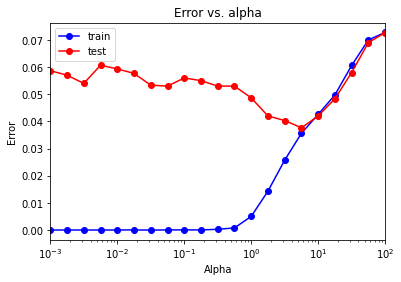

In [31]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

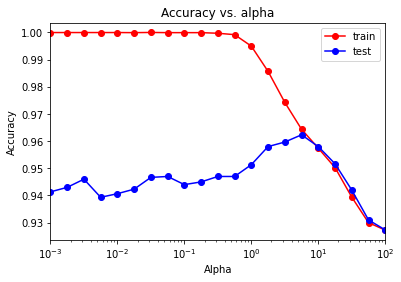

In [32]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

In [33]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.0
Minimum error on the testing set:  0.03766666666666667


In [34]:
alpha_local_opt = alpha_arr[test_err == min_test_err][0]
print('Optimal alpha value: ', alpha_local_opt)

Optimal alpha value:  5.623413251903491


### Classifier training at the optimal alpha value (for 1 hidden layer of 50 neurons)

In [35]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = 50,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: user 1min 3s, sys: 38.7 s, total: 1min 42s
Wall time: 26.3 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=50, max_iter=1000, random_state=42,
              solver='lbfgs')

In [36]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Error on the training set: ', err_train)
print('Error on the testing set: ', err_test)

Error on the training set:  0.03562962962962963
Error on the testing set:  0.03766666666666667


### Selection of the neurons number of 1 hidden layer for the optimal (for 1 hidden layer of 50 neurons) alpha value

In [37]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = size,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 31min 27s, sys: 17min 20s, total: 48min 47s
Wall time: 12min 42s


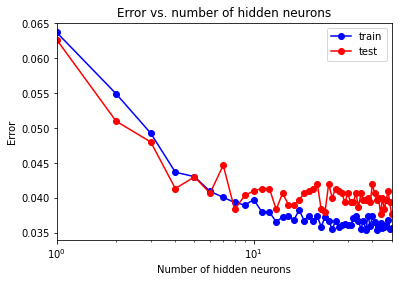

In [38]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

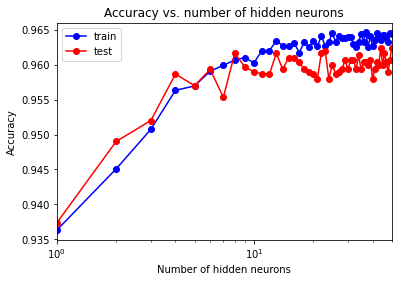

In [39]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Accuracy')
plt.legend()
pass

In [40]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.03537037037037037
Minimum error on the testing set:  0.03766666666666667


In [41]:
hidden_layer_local_opt_1 = hidden_layer[test_err == min_test_err][0]
print('The optimal value of the neurons number in the hidden layer: ', hidden_layer_local_opt_1)

The optimal value of the neurons number in the hidden layer:  44


### Training a neural network with the optimal alpha value (for 1 hidden layer of 50 neurons) and the optimal neurons number in the first hidden layer (for a given alpha)

In [42]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = hidden_layer_local_opt_1,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: user 46.1 s, sys: 25.3 s, total: 1min 11s
Wall time: 18.2 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=44, max_iter=1000, random_state=42,
              solver='lbfgs')

In [43]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Error on the training set: ', err_train)
print('Error on the testing set: ', err_test)

Error on the training set:  0.036444444444444446
Error on the testing set:  0.03766666666666667


### Selection of the neurons number in the second hidden layer with the optimal alpha value (for 1 hidden layer of 50 neurons) and the optimal neurons number in the first hidden layer (for a given alpha)

In [44]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = (hidden_layer_local_opt_1, size),
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 3h 31min 45s, sys: 1h 57min 40s, total: 5h 29min 25s
Wall time: 1h 24min 18s


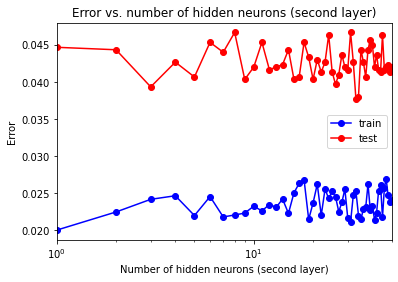

In [45]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Error')
plt.legend()
pass

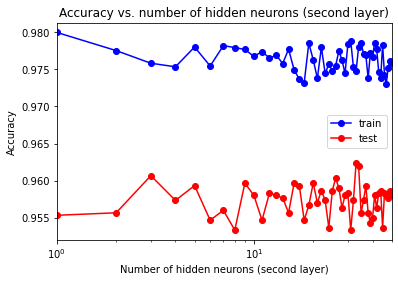

In [46]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Accuracy')
plt.legend()
pass

In [47]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.020037037037037037
Minimum error on the testing set:  0.03766666666666667


In [48]:
hidden_layer_local_opt_2 = hidden_layer[test_err == min_test_err][0]
print('The optimal value of the number of neurons in the second hidden layer: ', hidden_layer_local_opt_2)

The optimal value of the number of neurons in the second hidden layer:  33


### Training a neural network with the optimal alpha value (for 1 hidden layer of 50 neurons), optimal neurons numbers in the first and second hidden layers

In [49]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = (hidden_layer_local_opt_1, hidden_layer_local_opt_2),
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: user 4min 29s, sys: 2min 32s, total: 7min 2s
Wall time: 1min 48s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=(44, 33), max_iter=1000, random_state=42,
              solver='lbfgs')

In [50]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Error on the training set: ', err_train)
print('Error on the testing set: ', err_test)

Error on the training set:  0.02525925925925926
Error on the testing set:  0.03766666666666667


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>The second way to select hyperparameters</h1></div>

### Simultaneous enumeration of alpha and the neurons number in the hidden layer (for a neural network with one hidden layer)

In [51]:
%%time
hidden_layer = np.arange(hidden_layer_local_opt_1 - 2, hidden_layer_local_opt_1 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size in hidden_layer:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, 
                                  hidden_layer_sizes = size,
                                  solver = 'lbfgs', 
                                  max_iter = 1000, 
                                  activation = 'logistic',
                                  random_state = 42)


        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        
        params = {'alpha': alpha, 'hidden_layer': size} 
        opt_params.append(params)

CPU times: user 1h 24min 21s, sys: 47min 58s, total: 2h 12min 19s
Wall time: 34min 12s


In [52]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.0
Minimum error on the testing set:  0.03766666666666667


In [53]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt = opt_params[index_opt]['hidden_layer']
print('The optimal value of the neurons number in the hidden layer: ', hidden_layer_opt)

alpha_opt = opt_params[index_opt]['alpha']
print('Optimal alpha value: ', alpha_opt)

The optimal value of the neurons number in the hidden layer:  44
Optimal alpha value:  5.623413251903491


### Simultaneous enumeration of alpha, the neurons number in the first and second hidden layers

In [54]:
%%time
hidden_layer_first = np.arange(hidden_layer_local_opt_1 - 2, hidden_layer_local_opt_1 + 2)
hidden_layer_second = np.arange(hidden_layer_local_opt_2 - 2, hidden_layer_local_opt_2 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size_first in hidden_layer_first:
    for size_second in hidden_layer_second:
        for alpha in alpha_arr:
            mlp_model = MLPClassifier(alpha = alpha, 
                                      hidden_layer_sizes = (size_first, size_second), 
                                      solver = 'lbfgs', 
                                      max_iter = 1000, 
                                      activation = 'logistic',
                                      random_state = 42)


            mlp_model.fit(X_train, y_train)

            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)

            train_err.append(np.mean(y_train != y_train_pred))
            test_err.append(np.mean(y_test != y_test_pred))
            train_acc.append(accuracy_score(y_train, y_train_pred))
            test_acc.append(accuracy_score(y_test, y_test_pred))
            
            params = {'alpha': alpha, 'hidden_layer_first': size_first, 'hidden_layer_second': size_second} 
            opt_params.append(params)

CPU times: user 17h 25min 46s, sys: 9h 29min 38s, total: 1d 2h 55min 25s
Wall time: 6h 54min 33s


In [55]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.0
Minimum error on the testing set:  0.037


In [56]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt_1 = opt_params[index_opt]['hidden_layer_first']
print('The optimal value of the neurons number in the first hidden layer: ', hidden_layer_opt_1)

hidden_layer_opt_2 = opt_params[index_opt]['hidden_layer_second']
print('The optimal value of the neurons number in the second hidden layer: ', hidden_layer_opt_2)

alpha_opt = opt_params[index_opt]['alpha']
print('Optimal alpha value: ', alpha_opt)

The optimal value of the neurons number in the first hidden layer:  43
The optimal value of the neurons number in the second hidden layer:  33
Optimal alpha value:  10.0


***
<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Conclusions</h1></div>

> <ul>
> <li>The error on the test sample is lesser than for other classifiers (in part 1).</li>
> <li>The training didn't take place on the entire sample, but only on part of it. Despite this a very good result was achieved.</li>
> <li>Since the quality of training of neural networks depends on the amount of input data, with an increase in the training sample, a result that is better than the previous one can be achieved.</li>
> <li>Hyperparameters were selected in narrow ranges. By increasing the ranges, a smaller error can be achieved.</li>
> </ul>

***